In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

ROOT = "/content/drive/MyDrive/cv_task/"
os.chdir(ROOT)

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

In [ ]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred


def threshold_image(image):
    # Use Otsu's thresholding
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binary


def morphological_operations(binary_image):
    # Define a kernel for morphological operations
    kernel = np.ones((3, 3), np.uint8)
    # Apply dilation followed by erosion (closing)
    closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=2)
    return closing


def detect_and_draw_contours(image, processed_image):
    # Find contours
    contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
    return image, len(contours)


def process_images(input_folder, width, height):
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)

            # Preprocess the image
            preprocessed_image = preprocess_image(image)

            # Threshold the image
            binary_image = threshold_image(preprocessed_image)

            # Apply morphological operations
            morphed_image = morphological_operations(binary_image)

            # Detect and draw contours
            output_image, contour_count = detect_and_draw_contours(image.copy(), morphed_image)

            # Resize the image
            resized_image = cv2.resize(output_image, (width, height))

            # Display the result
            cv2_imshow(resized_image)
            print(f"Processed {filename}: Found {contour_count} contours")




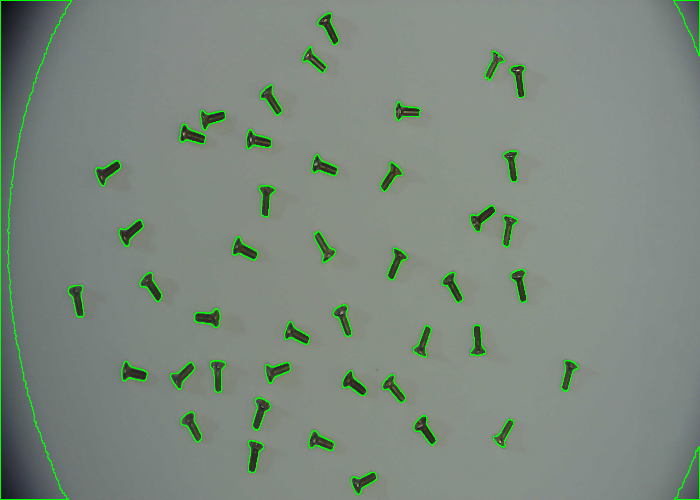

Processed img4.jpg: Found 46 contours


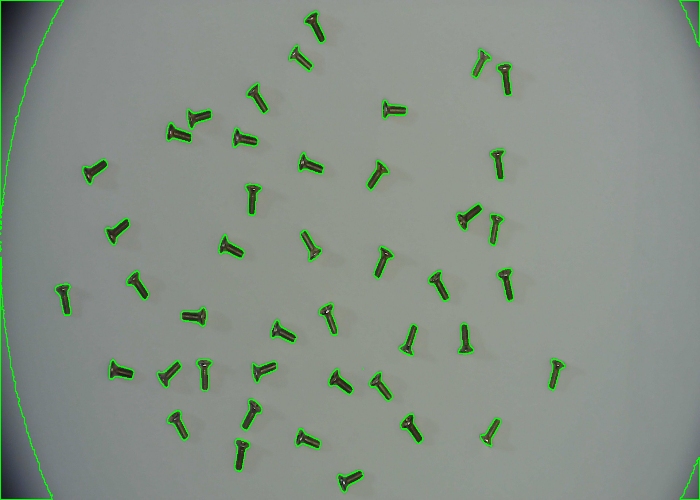

Processed img3.jpg: Found 53 contours


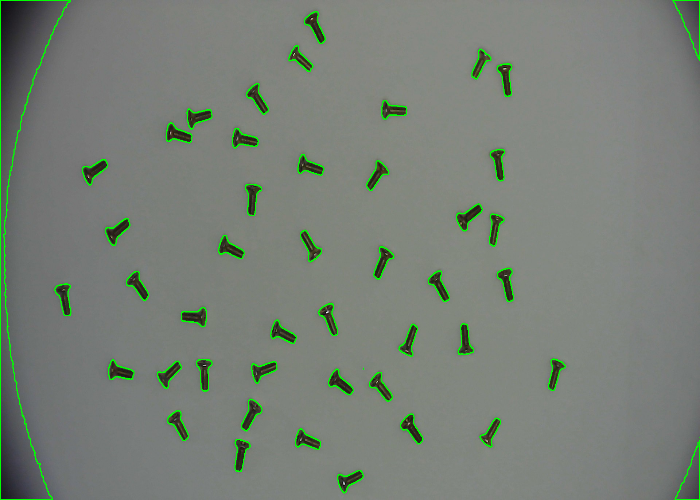

Processed img5.jpg: Found 48 contours


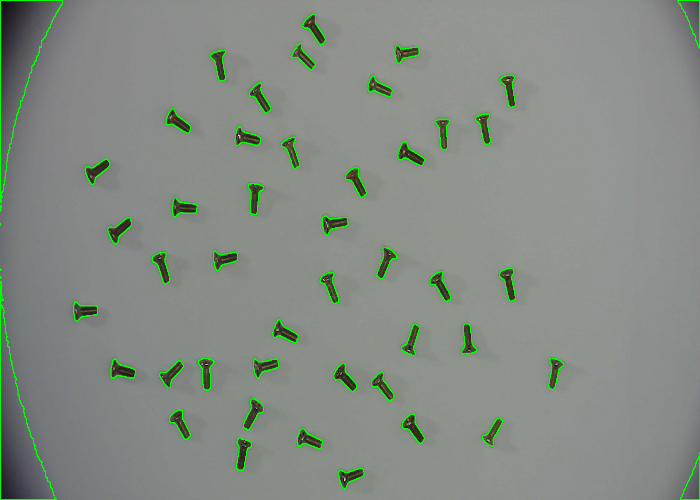

Processed img6.jpg: Found 53 contours


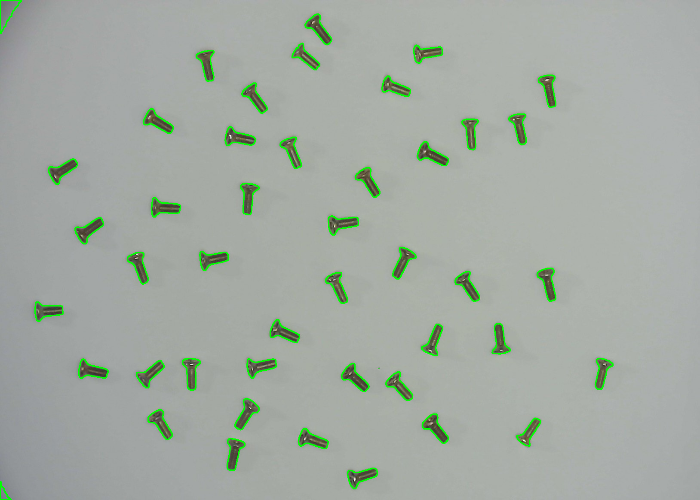

Processed img1_43_nosy.jpg: Found 46 contours


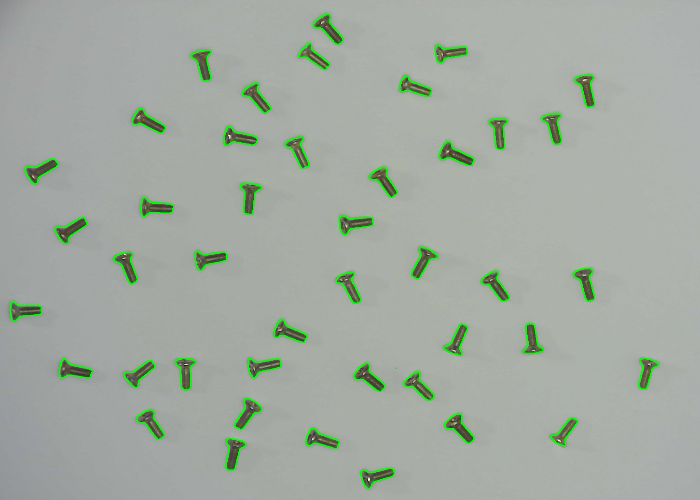

Processed img1.jpg: Found 44 contours


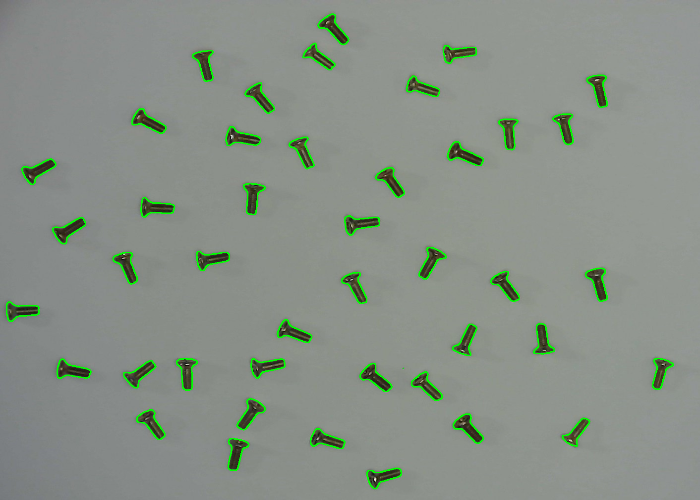

Processed img2.jpg: Found 44 contours


In [ ]:
# Paths to the input and output folders
input_folder = "/content/drive/MyDrive/cv_task/CountingChallenge/Screws_2024_07_15"
width, height = 700, 500

# Process images
process_images(input_folder, width, height)